<a href="https://colab.research.google.com/github/Thaizalu/Aprendizado/blob/main/Notebook_An%C3%A1lise_de_dados_com_Python_utilizando_o_ChatGPT_como_assistente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Alt text: Logo da Zoop](https://github.com/alura-cursos/python-analise-chatgpt-assistente/blob/main/Logos%20e%20paleta%20-%20ZOOP/Logo%20fundo%20colorido%20(2).png?raw=true)

# Aula 1 - Acesso aos dados

In [1]:
url = 'https://github.com/alura-cursos/python-analise-chatgpt-assistente/raw/main/Dados/dados_vendas.json'

### Prompt:

Vamos atuar como cientistas de dados em uma empresa de supermercados.

Recebemos dados no formato de arquivo JSON, estruturados em listas e dicionários. O arquivo está disponibilizado em uma URL do Github.

Precisamos analisar esses dados para ajudar nas decisões da empresa. Programamos em Python e conhecemos as bibliotecas de análise de dados Numpy e Pandas. Portanto, priorize o uso dessas bibliotecas.

Por favor, nos informe como podemos fazer a leitura desses dados no formato JSON e como podemos visualizá-los em formato de tabela no Python.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_json(url)
df.head()

,item_identificador,loja_identificador,vendas_totais,item,loja
0,FDB08,OUT018,176503.58,"{'item_peso': 6.055, 'item_conteudo_gordura': ...","{'loja_ano_estabelecimento': 2019, 'loja_taman..."
1,DRQ35,OUT049,185758.20,"{'item_peso': 9.3, 'item_conteudo_gordura': 'B...","{'loja_ano_estabelecimento': 2009, 'loja_taman..."
2,FDD14,OUT018,165983.94,"{'item_peso': 20.7, 'item_conteudo_gordura': '...","{'loja_ano_estabelecimento': 2019, 'loja_taman..."
3,FDY37,OUT045,314923.40,"{'item_peso': 17.0, 'item_conteudo_gordura': '...","{'loja_ano_estabelecimento': 2012, 'loja_taman..."
4,FDY59,OUT018,64782.34,"{'item_peso': 8.195, 'item_conteudo_gordura': ...","{'loja_ano_estabelecimento': 2019, 'loja_taman..."


### Prompt:

O DataFrame "df" possui as colunas "item_identificador", "loja_identificador", "vendas_totais", "item" e "loja".

As colunas "item" e "loja" contêm dicionários aninhados dentro de cada uma das linhas. Como posso transformar os dados dos dicionários e colunas para torná-los mais acessíveis no meu DataFrame?

In [4]:
from pandas import json_normalize

# Suponha que 'item' e 'loja' são as colunas com dicionários aninhados
df_item = json_normalize(df['item'])
df_loja = json_normalize(df['loja'])

# Combine os novos DataFrames com o original
df = pd.concat([df, df_item, df_loja], axis=1)

# Remova as colunas originais 'item' e 'loja'
df = df.drop(['item', 'loja'], axis=1)

# Agora você tem os dados expandidos em colunas separadas
print(df.head())

  item_identificador loja_identificador  vendas_totais  item_peso  \
0              FDB08             OUT018      176503.58      6.055   
1              DRQ35             OUT049      185758.20      9.300   
2              FDD14             OUT018      165983.94     20.700   
3              FDY37             OUT045      314923.40     17.000   
4              FDY59             OUT018       64782.34      8.195   

   item_conteudo_gordura  item_visibilidade           item_tipo  item_preco  \
0  Baixo Teor de Gordura           0.031230   Frutas e Vegetais      160.36   
1  Baixo Teor de Gordura           0.042357  Bebidas Alcoólicas      123.24   
2  Baixo Teor de Gordura           0.170500           Enlatados      184.13   
3                Regular           0.026623           Enlatados      144.25   
4  Baixo Teor de Gordura           0.000000         Confeitaria       93.15   

  item_quantidade_venda  loja_ano_estabelecimento loja_tamanho  \
0                  None                     

In [5]:
df

,item_identificador,loja_identificador,vendas_totais,item_peso,item_conteudo_gordura,item_visibilidade,item_tipo,item_preco,item_quantidade_venda,loja_ano_estabelecimento,loja_tamanho,loja_tipo_localizacao,loja_tipo
0,FDB08,OUT018,176503.58,6.055,Baixo Teor de Gordura,0.031230,Frutas e Vegetais,160.36,None,2019,Médio,Nível 3,Supermercado Tipo 2
1,DRQ35,OUT049,185758.20,9.300,Baixo Teor de Gordura,0.042357,Bebidas Alcoólicas,123.24,None,2009,Médio,Nível 1,Supermercado Tipo 1
2,FDD14,OUT018,165983.94,20.700,Baixo Teor de Gordura,0.170500,Enlatados,184.13,None,2019,Médio,Nível 3,Supermercado Tipo 2
3,FDY37,OUT045,314923.40,17.000,Regular,0.026623,Enlatados,144.25,None,2012,None,Nível 2,Supermercado Tipo 1
4,FDY59,OUT018,64782.34,8.195,Baixo Teor de Gordura,0.000000,Confeitaria,93.15,None,2019,Médio,Nível 3,Supermercado Tipo 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8545,FDY08,OUT010,28096.76,9.395,Regular,0.286345,Frutas e Vegetais,139.18,None,2008,None,Nível 3,Mercado
8546,FDC41,OUT017,130163.90,15.600,Baixo Teor de Gordura,0.117575,Alimentos Congelados,75.67,None,2017,None,Nível 2,Supermercado Tipo 1
8547,NCQ53,OUT045,614533.40,17.600,Baixo Teor de Gordura,0.018944,Mercearia,237.36,None,2012,None,Nível 2,Supermercado Tipo 1
8548,FDL46,OUT017,164985.24,20.350,baixo teor de gordura,0.054363,Lanches,117.95,None,2017,None,Nível 2,Supermercado Tipo 1


## Desafio: hora da prática!

### Prompt

Estamos atuando como cientistas de dados em uma empresa de supermercados.

Recebemos dados no formato de arquivo JSON, estruturados em listas e dicionários. O arquivo está disponibilizado em uma URL do GitHub, que está salva em uma variável chamada "url_franquias".

Programamos em Python e temos conhecimento das bibliotecas de análise de dados Numpy e Pandas. Portanto, priorize o uso dessas bibliotecas.

Por favor, informe-nos como podemos fazer a leitura desses dados no formato JSON e como podemos visualizá-los em formato de tabela no Python.


In [6]:
url_franquias = 'https://raw.githubusercontent.com/alura-cursos/python-analise-chatgpt-assistente/main/Dados/vendas_mensal_franquias.json'


In [7]:
import pandas as pd
import numpy as np
import requests  # Para fazer a requisição HTTP

url_franquias = 'https://raw.githubusercontent.com/alura-cursos/python-analise-chatgpt-assistente/main/Dados/vendas_mensal_franquias.json'

response = requests.get(url_franquias)
data = response.json()

data = pd.DataFrame(data)

# Para uma melhor visualização dos dados removemos o print
data


,ID_loja,vendas,loja
0,OUT431,"{'vendas_por_dia': None, 'vendas_loja': 82220....","{'tamanho_loja': 'pequeno', 'cliente_por_dia':..."
1,OUT738,"{'vendas_por_dia': None, 'vendas_loja': 103231...","{'tamanho_loja': 'Médio', 'cliente_por_dia': 3..."
2,OUT426,"{'vendas_por_dia': None, 'vendas_loja': 55487....","{'tamanho_loja': 'pequeno', 'cliente_por_dia':..."
3,OUT948,"{'vendas_por_dia': None, 'vendas_loja': 96417....","{'tamanho_loja': 'Pequeno', 'cliente_por_dia':..."
4,OUT139,"{'vendas_por_dia': None, 'vendas_loja': 56809....","{'tamanho_loja': 'Pequeno', 'cliente_por_dia':..."
...,...,...,...
893,OUT206,"{'vendas_por_dia': None, 'vendas_loja': 87875....","{'tamanho_loja': 'Médio', 'cliente_por_dia': 8..."
894,OUT370,"{'vendas_por_dia': None, 'vendas_loja': 29410....","{'tamanho_loja': 'Pequeno', 'cliente_por_dia':..."
895,OUT960,"{'vendas_por_dia': None, 'vendas_loja': 57362....","{'tamanho_loja': 'Pequeno', 'cliente_por_dia':..."
896,OUT535,"{'vendas_por_dia': None, 'vendas_loja': 61585....","{'tamanho_loja': 'pequeno', 'cliente_por_dia':..."


In [8]:
# Suponha que os dicionários dentro das colunas "vendas" e "loja" tenham as chaves "total_vendas" e "nome_loja"
data_vendas = pd.json_normalize(data['vendas'])
data_loja = pd.json_normalize(data['loja'])

# Concatenar os novos DataFrames com o original
data = pd.concat([data, data_vendas, data_loja], axis=1)

# Remover as colunas originais "vendas" e "loja"
data = data.drop(['vendas', 'loja'], axis=1)

In [9]:
data

,ID_loja,vendas_por_dia,vendas_loja,tamanho_loja,cliente_por_dia,itens_disponiveis
0,OUT431,NaN,82220.053714,pequeno,330.0,1968
1,OUT738,NaN,103231.728424,Médio,310.0,2189
2,OUT426,NaN,55487.996318,pequeno,870.0,1736
3,OUT948,NaN,96417.999686,Pequeno,1560.0,1099
4,OUT139,NaN,56809.025487,Pequeno,10.0,1516
...,...,...,...,...,...,...
893,OUT206,NaN,87875.440154,Médio,810.0,2031
894,OUT370,NaN,29410.047183,Pequeno,780.0,1439
895,OUT960,NaN,57362.867709,Pequeno,660.0,1510
896,OUT535,NaN,61585.737092,pequeno,990.0,1836



# Aula 2 - Exploração dos dados

### Prompt:

O DataFrame "df" contém dados referentes às vendas de diversos produtos em várias lojas do supermercado. São fornecidos IDs de produtos e IDs de lojas que comercializaram esses produtos, o total arrecadado em vendas, bem como descrições sobre o produto vendido e a loja que o vendeu.

Estamos iniciando a etapa de exploração de dados, na qual desejamos conhecer os valores informados e identificar se existem valores ausentes, duplicados e outras inconsistências.

Por favor, construa um código para executar a etapa de exploração de dados usando o Python.

Não é necessário utilizar "print()" para mostrar o resultado das consultas.

In [10]:
# Verificar as primeiras linhas do DataFrame
df.head()

,item_identificador,loja_identificador,vendas_totais,item_peso,item_conteudo_gordura,item_visibilidade,item_tipo,item_preco,item_quantidade_venda,loja_ano_estabelecimento,loja_tamanho,loja_tipo_localizacao,loja_tipo
0,FDB08,OUT018,176503.58,6.055,Baixo Teor de Gordura,0.031230,Frutas e Vegetais,160.36,None,2019,Médio,Nível 3,Supermercado Tipo 2
1,DRQ35,OUT049,185758.20,9.300,Baixo Teor de Gordura,0.042357,Bebidas Alcoólicas,123.24,None,2009,Médio,Nível 1,Supermercado Tipo 1
2,FDD14,OUT018,165983.94,20.700,Baixo Teor de Gordura,0.170500,Enlatados,184.13,None,2019,Médio,Nível 3,Supermercado Tipo 2
3,FDY37,OUT045,314923.40,17.000,Regular,0.026623,Enlatados,144.25,None,2012,None,Nível 2,Supermercado Tipo 1
4,FDY59,OUT018,64782.34,8.195,Baixo Teor de Gordura,0.000000,Confeitaria,93.15,None,2019,Médio,Nível 3,Supermercado Tipo 2


In [11]:
# Informações gerais sobre o DataFrame, incluindo tipos de dados e valores não nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8550 entries, 0 to 8549
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   item_identificador        8550 non-null   object 
 1   loja_identificador        8550 non-null   object 
 2   vendas_totais             8550 non-null   float64
 3   item_peso                 7081 non-null   float64
 4   item_conteudo_gordura     8550 non-null   object 
 5   item_visibilidade         8550 non-null   float64
 6   item_tipo                 8550 non-null   object 
 7   item_preco                8550 non-null   float64
 8   item_quantidade_venda     0 non-null      object 
 9   loja_ano_estabelecimento  8550 non-null   int64  
 10  loja_tamanho              6133 non-null   object 
 11  loja_tipo_localizacao     8550 non-null   object 
 12  loja_tipo                 8550 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 868.5+ KB


In [12]:
# Estatísticas descritivas para colunas numéricas
df.describe()

,vendas_totais,item_peso,item_visibilidade,item_preco,loja_ano_estabelecimento
count,8.550000e+03,7081.000000,8550.000000,8550.000000,8550.000000
mean,2.181949e+05,12.855023,0.066150,141.007453,2007.830409
std,1.708098e+05,4.643508,0.051578,62.333062,8.372541
min,3.329000e+03,4.555000,0.000000,31.290000,1995.000000
25%,8.349132e+04,8.770000,0.027024,93.787500,1997.000000
50%,1.794331e+05,12.600000,0.053978,142.935000,2009.000000
75%,3.100963e+05,16.850000,0.094646,185.760000,2014.000000
max,1.308696e+06,21.350000,0.328391,266.890000,2019.000000


In [13]:
# Contagem de valores únicos em cada coluna
df.nunique()

item_identificador          1559
loja_identificador            10
vendas_totais               3493
item_peso                    415
item_conteudo_gordura          5
item_visibilidade           7880
item_tipo                     16
item_preco                  4839
item_quantidade_venda          0
loja_ano_estabelecimento       9
loja_tamanho                   3
loja_tipo_localizacao          3
loja_tipo                      4
dtype: int64

In [14]:
# Verificar valores duplicados no DataFrame
df.duplicated().sum()

27

In [15]:
# Verificar valores ausentes em cada coluna
df.isnull().sum()

item_identificador             0
loja_identificador             0
vendas_totais                  0
item_peso                   1469
item_conteudo_gordura          0
item_visibilidade              0
item_tipo                      0
item_preco                     0
item_quantidade_venda       8550
loja_ano_estabelecimento       0
loja_tamanho                2417
loja_tipo_localizacao          0
loja_tipo                      0
dtype: int64

In [16]:
df['item_conteudo_gordura'].unique()

array(['Baixo Teor de Gordura', 'Regular', 'BTG', 'reg',
       'baixo teor de gordura'], dtype=object)

### Prompt:

O DataFrame "df" contém dados relacionados às vendas durante um trimestre de um supermercado. Desejo utilizá-lo para verificar o desempenho dessas vendas.

Durante a exploração do "df", identificamos algumas inconsistências, como:

- Linhas duplicadas,
- Valores nulos e
- Dados categóricos que foram escritos de maneira não padronizada, dando a ideia de que existem mais categorias do que as que realmente existem.

O que devo fazer para garantir que essas inconsistências que encontrei não afetem minha análise?

## Desafio: hora da prática!

### Prompt:

O DataFrame "df" contém dados referentes às vendas de várias franquias dentro de um mês de atuação. São informados os valores totais obtidos em vendas, bem como características da loja, quantidade de clientes por dia e itens comercializados.

Estamos iniciando a etapa de exploração de dados, na qual desejamos conhecer os valores informados e identificar se existem valores ausentes, duplicados e outras inconsistências.

Por favor, construa um código para executar a etapa de exploração de dados usando o Python.

Não é necessário utilizar "print()" para mostrar o resultado das consultas.

In [17]:
# Verifique as primeiras linhas do DataFrame
data.head()


,ID_loja,vendas_por_dia,vendas_loja,tamanho_loja,cliente_por_dia,itens_disponiveis
0,OUT431,NaN,82220.053714,pequeno,330.0,1968
1,OUT738,NaN,103231.728424,Médio,310.0,2189
2,OUT426,NaN,55487.996318,pequeno,870.0,1736
3,OUT948,NaN,96417.999686,Pequeno,1560.0,1099
4,OUT139,NaN,56809.025487,Pequeno,10.0,1516


In [18]:
# Resumo estatístico das colunas numéricas
data.describe()

,vendas_por_dia,vendas_loja,cliente_por_dia,itens_disponiveis
count,1.00000,898.000000,880.000000,898.000000
mean,4294.64706,71071.894236,786.443182,1781.561247
std,NaN,22143.481947,267.038209,299.716498
min,4294.64706,19371.958539,10.000000,932.000000
25%,4294.64706,54510.922957,600.000000,1574.500000
50%,4294.64706,69228.128375,780.000000,1773.000000
75%,4294.64706,86119.754844,970.000000,1982.000000
max,4294.64706,152897.262005,1560.000000,2667.000000


In [19]:
# Informações gerais sobre o DataFrame, incluindo contagem de valores não nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_loja            898 non-null    object 
 1   vendas_por_dia     1 non-null      float64
 2   vendas_loja        898 non-null    float64
 3   tamanho_loja       878 non-null    object 
 4   cliente_por_dia    880 non-null    float64
 5   itens_disponiveis  898 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 42.2+ KB


In [20]:
# Verifique se existem valores duplicados
data.duplicated().sum()

2

In [21]:
# Verifique se existem valores ausentes por coluna
data.isnull().sum()

ID_loja                0
vendas_por_dia       897
vendas_loja            0
tamanho_loja          20
cliente_por_dia       18
itens_disponiveis      0
dtype: int64

In [22]:
# Contagem de valores únicos em cada coluna
data.nunique()

ID_loja              896
vendas_por_dia         1
vendas_loja          896
tamanho_loja           3
cliente_por_dia      130
itens_disponiveis    616
dtype: int64

In [23]:
data['tamanho_loja'].unique()


array(['pequeno', 'Médio', 'Pequeno', None], dtype=object)

# Aula 3 - Limpeza e tratamento

### Prompt:

Durante a exploração do DataFrame "df", identificamos 27 linhas duplicadas usando "df.duplicated().sum()".

O objetivo é analisar os dados em "df" para medir o desempenho de uma empresa durante um trimestre de vendas.

O que devemos fazer com os dados duplicados para garantir que não haja impacto negativo na análise?

In [24]:
df.drop_duplicates(inplace=True)

### Prompt:

Identificamos três colunas em "df" que apresentam valores nulos:

- A coluna "item_quantidade_venda" possui 8550 linhas com valores nulos.
- A coluna "item_peso" possui 1469 linhas com valores nulos.
- A coluna "loja_tamanho" possui 2417 linhas com valores nulos.

Houve um grande número de vendas de itens durante o trimestre, e não há justificativa para a ausência de dados na coluna "item_quantidade_venda", o que a torna uma coluna dispensável.

A coluna "item_peso" contém valores do tipo float, representando o peso em gramas dos produtos.

A coluna "loja_tamanho" possui três categorias de tamanho para supermercados.

Como devo lidar com esses dados nulos para garantir que minha análise não seja prejudicada?

In [25]:
df = df.drop('item_quantidade_venda', axis=1)

In [26]:
# Preencher valores nulos em 'item_peso' com a média
df['item_peso'] = df['item_peso'].fillna(df['item_peso'].mean())

In [27]:
# Preencher valores nulos em 'loja_tamanho' com a moda
df['loja_tamanho'].fillna('Não Registrado', inplace = True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8549
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   item_identificador        8523 non-null   object 
 1   loja_identificador        8523 non-null   object 
 2   vendas_totais             8523 non-null   float64
 3   item_peso                 8523 non-null   float64
 4   item_conteudo_gordura     8523 non-null   object 
 5   item_visibilidade         8523 non-null   float64
 6   item_tipo                 8523 non-null   object 
 7   item_preco                8523 non-null   float64
 8   loja_ano_estabelecimento  8523 non-null   int64  
 9   loja_tamanho              8523 non-null   object 
 10  loja_tipo_localizacao     8523 non-null   object 
 11  loja_tipo                 8523 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


### Prompt:

A coluna "item_conteudo_gordura" do DataFrame "df" apresenta 5 valores únicos dados por: 'Baixo Teor de Gordura', 'Regular', 'BTG', 'reg' e 'baixo teor de gordura'.

Os valores únicos da coluna "item_conteudo_gordura" deveriam ser apenas 'Baixo Teor de Gordura' e 'Regular', mas foram inseridos sem padronização, o que resultou em mais categorias do que o desejado.

Como posso ajustar os dados da coluna "item_conteudo_gordura" para manter apenas as duas categorias padrões?

In [29]:
# Mapear os valores indesejados para os valores padrões
mapeamento = {'BTG': 'Baixo Teor de Gordura', 'reg': 'Regular', 'baixo teor de gordura': 'Baixo Teor de Gordura'}

# Substituir os valores na coluna
df['item_conteudo_gordura'] = df['item_conteudo_gordura'].replace(mapeamento)

# Verificar os valores únicos após a substituição
df['item_conteudo_gordura'].unique()

array(['Baixo Teor de Gordura', 'Regular'], dtype=object)

## Desafio: hora da prática!

### Prompt:

Durante a exploração do DataFrame "df", identificamos 2 linhas duplicadas usando "df.duplicated().sum()".

O DataFrame "df" deveria conter apenas informações de vendas de 986 franquias, mas duas delas apareceram repetidas, sem justificativa alguma.

O que devemos fazer com essas linhas duplicadas para garantir que não haja impacto negativo na análise?

In [30]:
# Remova as linhas duplicadas do DataFrame
data = data.drop_duplicates()

# Verifique novamente se existem valores duplicados após a remoção
data.duplicated().sum()

0

### Prompt:

O DataFrame "data" possui 896 linhas. Identificamos três colunas em "data" que apresentam valores nulos:

895 valores nulos em "vendas_por_dia";
20 valores nulos em "tamanho_loja"; e
18 valores nulos em "cliente_por_dia".
A única quantidade significativa de valores nulos foi encontrada em "vendas_por_dia". Apenas um dado em "vendas_por_dia" foi preenchido, e não sabemos por que os demais não foram preenchidos. O que sabemos é que essa coluna se tornou inútil na análise.

A coluna "loja_tamanho" possui duas categorias de tamanho para supermercados.

A coluna "cliente_por_dia" contém valores do tipo float, representando a média de clientes obtida por dia em cada franquia.

Como devo lidar com esses dados nulos para garantir que minha análise não seja prejudicada?

In [31]:
# Remover a coluna 'vendas_por_dia'
data = data.drop('vendas_por_dia', axis=1)

In [33]:
# Preencher valores nulos em 'tamanho_loja' com a mediana
data['tamanho_loja'].fillna('Desconhecido', inplace=True)

In [34]:
# Preencher valores nulos em 'cliente_por_dia' com a média
media_cliente_por_dia = data['cliente_por_dia'].mean()
data['cliente_por_dia'].fillna(media_cliente_por_dia, inplace=True)

In [37]:
# Verificar valores nulos no DataFrame após as operações
data.isnull().sum()

ID_loja              0
vendas_loja          0
tamanho_loja         0
cliente_por_dia      0
itens_disponiveis    0
dtype: int64

### Prompt:

A coluna "tamanho_loja" do DataFrame "data" apresenta 3 valores únicos dados por: 'pequeno', 'Médio' e 'Pequeno'.

Os valores únicos da coluna "tamanho_loja" deveriam ser apenas 'Médio' e 'Pequeno', mas foram inseridos sem padronização, o que resultou em mais categorias do que o desejado.

Como posso ajustar os dados da coluna "tamanho_loja" para manter apenas as duas categorias padrões?

In [38]:
# Substituir valores incorretos na coluna 'tamanho_loja'
data['tamanho_loja'] = data['tamanho_loja'].replace({'pequeno': 'Pequeno'})

# Verificar os valores únicos após a substituição
data['tamanho_loja'].unique()


array(['Pequeno', 'Médio', 'Desconhecido'], dtype=object)

### Prompt:

A coluna "cliente_por_dia" do DataFrame "data" contém valores registrados como tipo "float64". No entanto, a coluna "cliente_por_dia" contém apenas dados inteiros.

Como posso ajustar os dados da coluna "cliente_por_dia" para o tipo correspondente aos seus dados?

In [39]:
# Converter a coluna 'cliente_por_dia' para o tipo inteiro
data['cliente_por_dia'] = data['cliente_por_dia'].astype(int)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 897
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_loja            896 non-null    object 
 1   vendas_loja        896 non-null    float64
 2   tamanho_loja       896 non-null    object 
 3   cliente_por_dia    896 non-null    int64  
 4   itens_disponiveis  896 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 42.0+ KB


# Aula 4 - Visualização dos dados

### Prompt:

Os dados do DataFrame "df" estão limpos e tratados. Agora, desejo iniciar a etapa de construção de gráficos para criar visualizações que ofereçam um bom suporte à análise do desempenho de vendas da empresa.

As colunas disponíveis em "df" são as seguintes:
- "item_identificador": Número único atribuído a cada Item
- "loja_identificador": Nome único da Loja
- "vendas_totais": Valor obtido em vendas totais
- "item_peso": Peso do Item em gramas
- "item_conteudo_gordura": Conteúdo de Gordura do Item
- "item_visibilidade": Valor de posicionamento de cada item.
- "item_tipo": Tipo de utilidade do item
- "item_preço": Preço unitário do item
- "loja_ano_estabelecimento": Ano de Estabelecimento da Loja.
- "loja_tamanho": Tamanho da Loja
- "loja_tipo_localização": Tipo de localização da loja
- "loja_tipo": Tipo de loja.

O objetivo é encontrar padrões ou informações que se destacam quando nos referimos ao total obtido em vendas especificado na coluna "vendas_totais".

Com base nas informações fornecidas, quais tipos de visualizações seriam úteis para atingir o objetivo de analisar o desempenho de vendas?

### Prompt:

O DataFrame "df" contém a coluna "vendas_totais", que informa o valor em reais obtido em vendas de produtos por várias lojas.

Além disso, em "df", temos a coluna "loja_tamanho" com 4 categorias de tamanho para lojas: 'Grande', 'Médio', 'Pequeno' e 'Não registrado'.

Desejo criar uma visualização que permita identificar o total obtido em vendas para as quatro categorias de tamanho de loja e representá-las em um gráfico de barras.

Os dados na coluna "vendas_totais" precisam ser agrupados pelas categorias de "loja_tamanho".

A figura da plotagem deve seguir a identidade visual da loja, com o fundo da figura e do plot na cor "#ebebeb" e as barras na cor "#e23155".

Além disso, é necessário exibir o total das vendas em milhões acima de cada coluna, com o texto dessa informação na cor "#19325c" e a estrutura "R$ valor M".

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

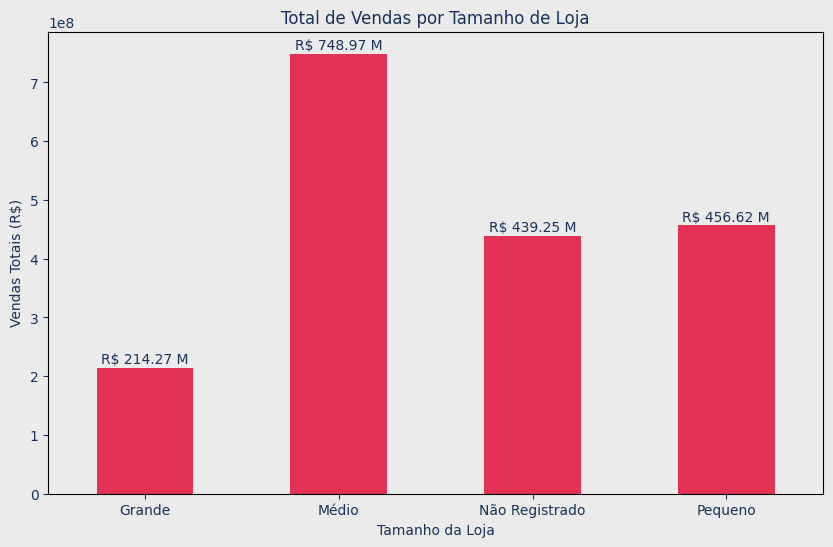

In [48]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Agrupar dados pela coluna 'loja_tamanho' e calcular o total de vendas em cada categoria
vendas_por_tamanho = df.groupby('loja_tamanho')['vendas_totais'].sum()

# Configurações de cores
cor_fundo = "#ebebeb"
cor_barras = "#e23155"
cor_texto = "#19325c"

# Configurações da figura e do plot
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(cor_fundo)
ax.set_facecolor(cor_fundo)

# Criar o gráfico de barras
vendas_por_tamanho.plot(kind='bar', color=cor_barras, ax=ax)

# Adicionar total de vendas acima de cada barra
for i, valor in enumerate(vendas_por_tamanho):
    ax.text(i, valor + 0.01 * max(vendas_por_tamanho), f'R$ {valor/1e6:.2f} M', ha='center', color=cor_texto)

# Configurações adicionais
ax.set_title('Total de Vendas por Tamanho de Loja', color=cor_texto)
ax.set_xlabel('Tamanho da Loja', color=cor_texto)
ax.set_ylabel('Vendas Totais (R$)', color=cor_texto)
ax.tick_params(axis='x', colors=cor_texto)
ax.tick_params(axis='y', colors=cor_texto)
plt.xticks(rotation=0)



# Mostrar a visualização
plt.show()


### Prompt:

O DataFrame "df" contém a coluna "vendas_totais", que informa o valor em reais obtido em vendas de produtos por várias lojas.

Além disso, em "df", temos a coluna "loja_tipo" com 4 categorias de tipo para lojas: 'Supermercado Tipo 1', 'Supermercado Tipo 2',  'Mercado', 'Supermercado Tipo 3'.

Desejo criar uma visualização que permita identificar o total obtido em vendas para as quatro categorias de tipo de loja e representá-las em um gráfico de barras.

Os dados na coluna "vendas_totais" precisam ser agrupados pelas categorias de "loja_tipo".

A figura da plotagem deve seguir a identidade visual da loja, com o fundo da figura e do plot na cor "#ebebeb" e as barras na cor "#e23155".

Além disso, é necessário exibir o total das vendas em milhões acima de cada coluna, com o texto dessa informação na cor "#19325c" e a estrutura "R$ valor M".

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

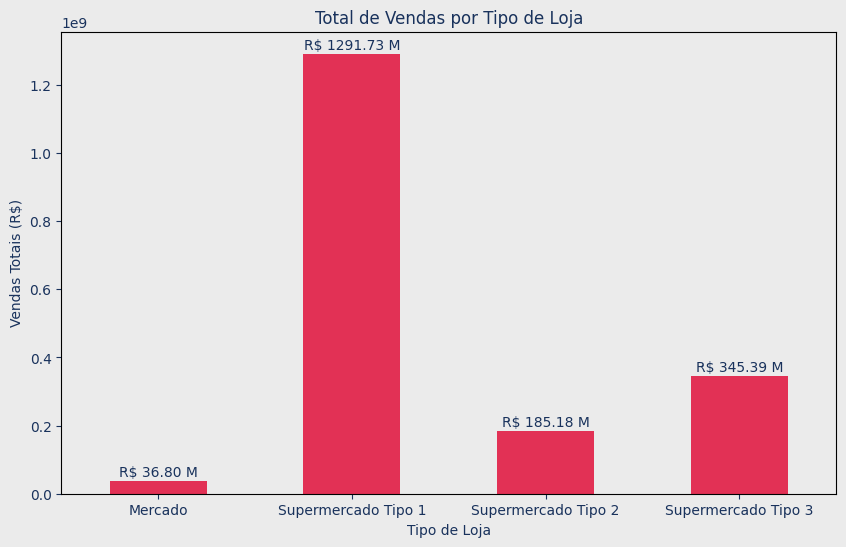

In [51]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Agrupar dados pela coluna 'loja_tipo' e calcular o total de vendas em cada categoria
vendas_por_tipo_loja = df.groupby('loja_tipo')['vendas_totais'].sum()

# Configurações de cores
cor_fundo = "#ebebeb"
cor_barras = "#e23155"
cor_texto = "#19325c"

# Configurações da figura e do plot
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(cor_fundo)
ax.set_facecolor(cor_fundo)

# Criar o gráfico de barras
vendas_por_tipo_loja.plot(kind='bar', color=cor_barras, ax=ax)

# Adicionar total de vendas acima de cada barra
for i, valor in enumerate(vendas_por_tipo_loja):
    ax.text(i, valor + 0.01 * max(vendas_por_tipo_loja), f'R$ {valor/1e6:.2f} M', ha='center', color=cor_texto)

# Configurações adicionais
ax.set_title('Total de Vendas por Tipo de Loja', color=cor_texto)
ax.set_xlabel('Tipo de Loja', color=cor_texto)
ax.set_ylabel('Vendas Totais (R$)', color=cor_texto)
ax.tick_params(axis='x', colors=cor_texto)
ax.tick_params(axis='y', colors=cor_texto)
plt.xticks(rotation=0)

# Mostrar a visualização
plt.show()


### Prompt:

O DataFrame "df" contém a coluna "vendas_totais", que informa o valor em reais obtido em vendas de produtos por várias lojas.

Além disso, em "df", temos a coluna "item_tipo" com 16 categorias de produtos.

Desejo criar uma visualização que permita identificar o total obtido em vendas por categorias de produtos em um gráfico de barras horizontais.

Os dados na coluna "vendas_totais" precisam ser agrupados pelas categorias de "item_tipo".

A figura da plotagem deve seguir a identidade visual da loja, com o fundo da figura e do plot na cor "#ebebeb".

As barras precisam estar na cor "#e23155".

Os valores das barras precisam estar ordenadas para manter um aspecto de funil.

Além disso, é necessário exibir o total das vendas em milhões dentro ou ao lado de cada barra, com o texto dessa informação na cor "#19325c" e na estrutura "R$ valor M".

Não mostre o grid no plot.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

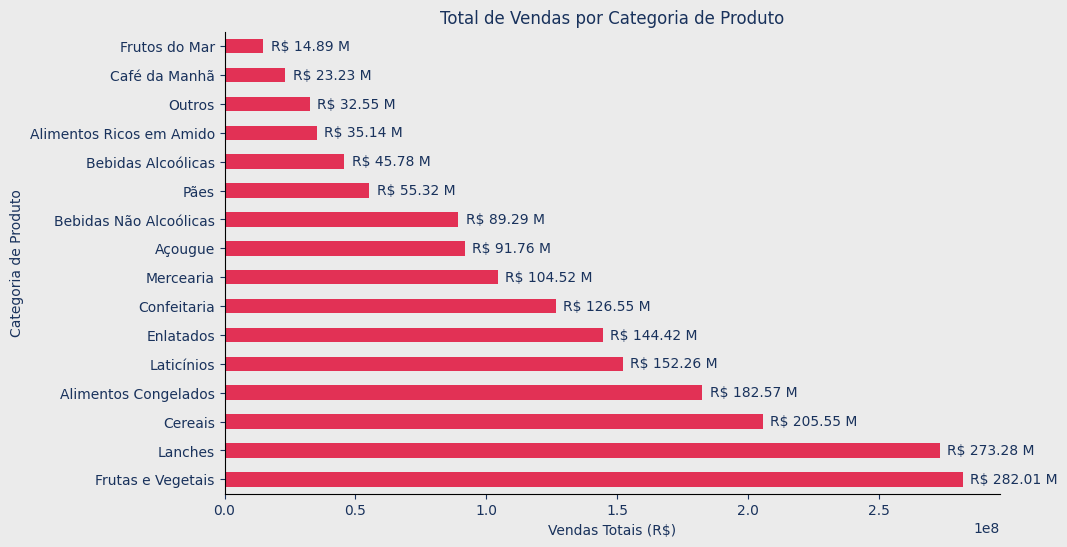

In [57]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Agrupar dados pela coluna 'item_tipo' e calcular o total de vendas em cada categoria
vendas_por_tipo_item = df.groupby('item_tipo')['vendas_totais'].sum()

# Ordenar os valores para criar um aspecto de funil
vendas_por_tipo_item = vendas_por_tipo_item.sort_values(ascending=False)

# Configurações de cores
cor_fundo = "#ebebeb"
cor_barras = "#e23155"
cor_texto = "#19325c"

# Configurações da figura e do plot
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(cor_fundo)
ax.set_facecolor(cor_fundo)

# Criar o gráfico de barras horizontais
vendas_por_tipo_item.plot(kind='barh', color=cor_barras, ax=ax)

# Adicionar total de vendas ao lado de cada barra
for i, valor in enumerate(vendas_por_tipo_item):
    ax.text(valor + 0.01 * max(vendas_por_tipo_item), i, f'R$ {valor/1e6:.2f} M', va='center', color=cor_texto)

# Configurações adicionais
ax.set_title('Total de Vendas por Categoria de Produto', color=cor_texto)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Vendas Totais (R$)', color=cor_texto)
ax.set_ylabel('Categoria de Produto', color=cor_texto)
ax.tick_params(axis='x', colors=cor_texto)
ax.tick_params(axis='y', colors=cor_texto)
ax.grid(False)

# Mostrar a visualização
plt.show()


### Prompt:

O DataFrame "df" contém a coluna "vendas_totais", que informa o valor em reais obtido em vendas de produtos por várias lojas.

Além disso, em "df", temos a coluna "item_conteudo_gordura" com 2 categorias: 'Baixo Teor de Gordura' e 'Regular'.

Desejo criar uma visualização que permita identificar o total obtido em vendas para as 2 categorias de quantidade de gordura em um gráfico de coluna.

Os dados na coluna "vendas_totais" precisam ser agrupados pelas categorias de "item_conteudo_gordura".

A figura da plotagem deve seguir a identidade visual da loja, com o fundo da figura e do plot na cor "#ebebeb".

As colunas de cada categoria devem ter cores específicas: a categoria 'Baixo Teor de Gordura' na cor "#e23155" e a categoria 'Regular' na cor "#acdcd3".

Além disso, é necessário exibir o total das vendas em milhões acima de cada coluna, com o texto dessa informação na cor "#19325c" e na estrutura "R$ valor M".

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

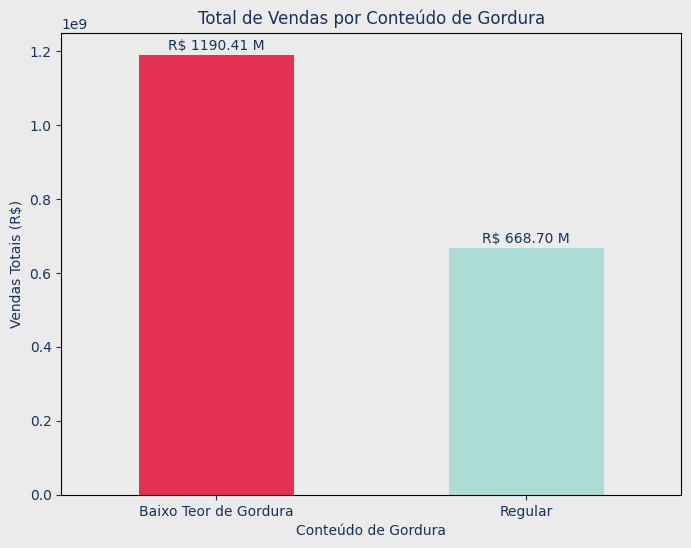

In [60]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Agrupar dados pela coluna 'item_conteudo_gordura' e calcular o total de vendas em cada categoria
vendas_por_gordura = df.groupby('item_conteudo_gordura')['vendas_totais'].sum()

# Configurações de cores
cor_fundo = "#ebebeb"
cor_baixo_gordura = "#e23155"
cor_regular = "#acdcd3"
cor_texto = "#19325c"

# Configurações da figura e do plot
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor(cor_fundo)
ax.set_facecolor(cor_fundo)

# Criar o gráfico de colunas
vendas_por_gordura.plot(kind='bar', color=[cor_baixo_gordura, cor_regular], ax=ax)

# Adicionar total de vendas acima de cada coluna
for i, valor in enumerate(vendas_por_gordura):
    ax.text(i, valor + 0.01 * max(vendas_por_gordura), f'R$ {valor/1e6:.2f} M', ha='center', color=cor_texto)

# Configurações adicionais
ax.set_title('Total de Vendas por Conteúdo de Gordura', color=cor_texto)
ax.set_xlabel('Conteúdo de Gordura', color=cor_texto)
ax.set_ylabel('Vendas Totais (R$)', color=cor_texto)
ax.tick_params(axis='x', colors=cor_texto)
ax.tick_params(axis='y', colors=cor_texto)
plt.xticks(rotation=0)

# Mostrar a visualização
plt.show()


## Desafio: Hora da prática!

### Prompt:

Os dados do DataFrame "data" estão limpos e tratados. Agora, desejo iniciar a etapa de construção de gráficos para criar visualizações que ofereçam um bom suporte à análise do desempenho de vendas das franquias no conjunto de dados.

As colunas disponíveis em "data" são as seguintes:

"ID_loja": código identificador das franquias.
"vendas_por_dia": média do total obtido em vendas por dia.
"vendas_loja": vendas totais obtidas em um mês.
"tamanho_loja": categoria do total obtido em vendas ("'Pequeno'" e "'Médio'").
"cliente_por_dia": média do total de clientes por dia.
"itens_disponiveis": número de itens diferentes disponíveis.
O objetivo é construir alguma visualização que possa fornecer informações úteis quanto ao desempenho das vendas.

Com base nas informações fornecidas, quais visualizações seriam úteis para atingir o objetivo?

Lembre-se de que os gráficos precisam ser simples de entender, mesmo para pessoas menos familiarizadas com dados.

### Prompt:

O DataFrame "data" contém a coluna "vendas_loja", que informa o valor em reais obtido em vendas de produtos por várias franquias.

Além disso, em "data", temos a coluna "itens_disponiveis" com valores do tipo inteiro informando o número de itens diferentes disponíveis.

Desejo criar uma visualização que permita identificar se há alguma correlação entre a variedade de produtos e as vendas e representá-las em um gráfico de dispersão.

A figura da plotagem deve seguir a identidade visual da loja, com o fundo da figura e do plot na cor "#ebebeb" e os pontos cor "#e23155".

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

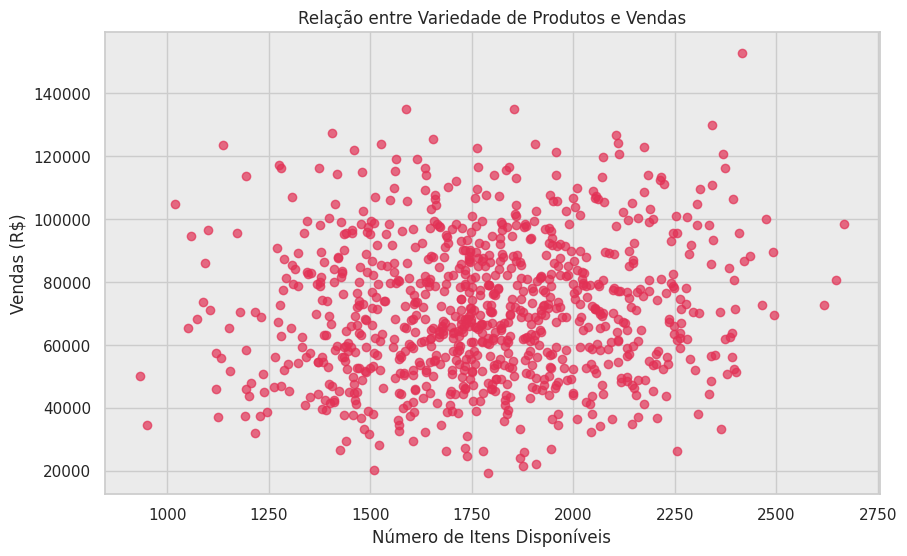

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração da identidade visual
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.rcParams['axes.facecolor'] = '#ebebeb'
plt.scatter(data['itens_disponiveis'], data['vendas_loja'], color='#e23155', alpha=0.7)

# Adicionando rótulos e título
plt.xlabel('Número de Itens Disponíveis')
plt.ylabel('Vendas (R$)')
plt.title('Relação entre Variedade de Produtos e Vendas')

# Exibindo a plotagem
plt.show()


### Prompt:

O DataFrame "data" contém a coluna "cliente_por_dia", que informa a média de frequência de clientes durante um mês por várias franquias.

Além disso, em "data", temos a coluna "tamanho_loja" com 3 categorias de tamanho para lojas: 'Médio', 'Pequeno' e 'Não registrado'.

Desejo criar uma visualização que permita identificar se há alguma diferença no número médio de clientes entre lojas pequenas e médias representando em um gráfico de barras.

A figura da plotagem deve seguir a identidade visual da loja, com o fundo da figura e do plot na cor "#ebebeb" e os pontos cor "#e23155".

Além disso, é necessário exibir a quantidade de clientes total acima de cada coluna, com o texto dessa informação na cor "#19325c" e a estrutura "valor clientes". Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

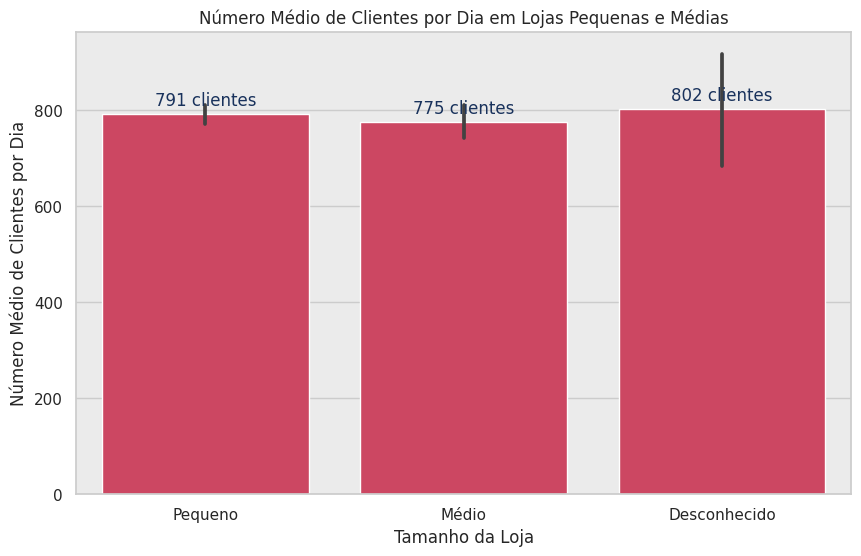

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração da identidade visual
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.rcParams['axes.facecolor'] = '#ebebeb'

# Criar um gráfico de barras
ax = sns.barplot(x='tamanho_loja', y='cliente_por_dia', data=data, palette=['#e23155', '#e23155', '#e23155'])

# Adicionar a quantidade total de clientes acima de cada coluna
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f} clientes', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', color='#19325c', xytext=(0, 10), textcoords='offset points')

# Adicionar rótulos e título
plt.xlabel('Tamanho da Loja')
plt.ylabel('Número Médio de Clientes por Dia')
plt.title('Número Médio de Clientes por Dia em Lojas Pequenas e Médias')

# Exibindo a plotagem
plt.show()


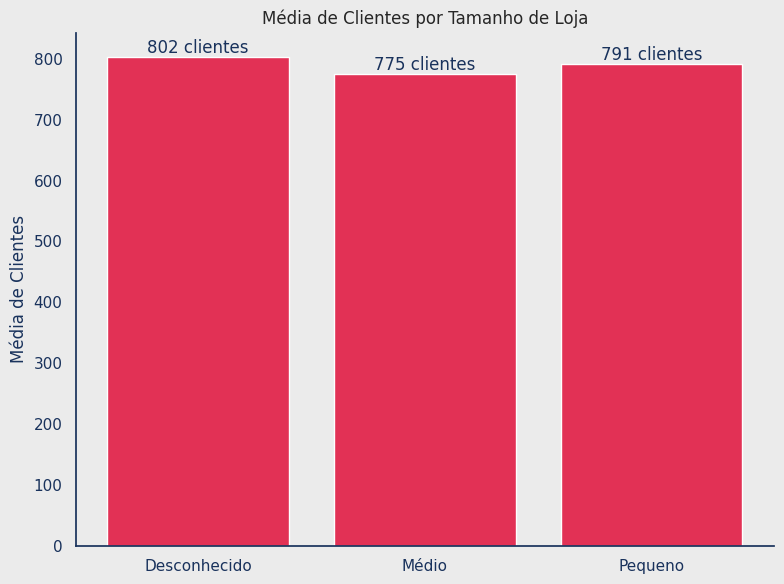

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

# Cores
cor_fundo = "#ebebeb"
cor_barras = "#e23155"
cor_texto = "#19325c"

# Crie a figura e o eixo
fig, ax = plt.subplots(figsize=(8, 6))
fig.set_facecolor(cor_fundo)
ax.set_facecolor(cor_fundo)

# Agrupe os dados por tamanho de loja e calcule a média de clientes para cada categoria
data_agrupado = data.groupby('tamanho_loja')['cliente_por_dia'].mean().reset_index()

# Plote as barras
barras = ax.bar(data_agrupado['tamanho_loja'], data_agrupado['cliente_por_dia'], color=cor_barras)

# Adicione o valor da média de clientes acima de cada barra
for bar in barras:
    altura_barra = bar.get_height()
    valor_media_clientes = altura_barra
    ax.annotate(f'{valor_media_clientes:.0f} clientes', xy=(bar.get_x() + bar.get_width() / 2, altura_barra),
                xytext=(0, 3), textcoords='offset points', ha='center', color=cor_texto)

# Configurações adicionais
ax.set_ylabel('Média de Clientes')
ax.set_title('Média de Clientes por Tamanho de Loja')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(cor_texto)
ax.spines['left'].set_color(cor_texto)
ax.tick_params(axis='x', colors=cor_texto)
ax.tick_params(axis='y', colors=cor_texto)
ax.xaxis.label.set_color(cor_texto)
ax.yaxis.label.set_color(cor_texto)
ax.grid(False)

# Exibir o gráfico
plt.tight_layout()
plt.show()
